In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, explained_variance_score, mean_absolute_error, mean_squared_error
%matplotlib inline 

In [3]:
from mll_calc.all_jobs import uncs, job_dirs

### hi hello

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'

In [5]:
#mll results for uncertainty = 5% (trainset frac = 100%)
#scikit results for trainset frac = 100% (no uncertainty)

In [6]:
job = 'Job0_unc0.05'
#a32mll = pd.read_csv(mll_gam + 'act32/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
n29mll = pd.read_csv(mll_nuc + 'train/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d1mll = pd.read_csv(mll_gam + 'd1_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d2mll = pd.read_csv(mll_gam + 'd2_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll_df = [n29mll, d1mll, d2mll]

d1mll31 = pd.read_csv(mll_gam + 'd1_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d2mll31 = pd.read_csv(mll_gam + 'd2_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d3mll31 = pd.read_csv(mll_gam + 'd3_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d4mll31 = pd.read_csv(mll_gam + 'd4_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d5mll31 = pd.read_csv(mll_gam + 'd5_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d6mll31 = pd.read_csv(mll_gam + 'd6_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll31 = [n29mll, d1mll31, d2mll31, d3mll31, d4mll31, d5mll31, d6mll31]

In [27]:
det = ['act32','d1', 'd2', 'd3', 'd5', 'd6', 'd4']
detdesc = ['act32', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd5_labr3', 'd6_sri2', 'd4_nai']
pred = ['reactor', 'burnup', 'enrichment', 'cooling']
predmll = ['ReactorType', 'Burnup', 'Enrichment', 'CoolingTime']
csv_end = '_scores.csv'
# for dataframes
algcol = ['knn31', 'dtree31', 'mll31', 'knn113', 'dtree113', 'mll113', 'pca_knn', 'pca_dtree']
scrcol  = ['Accuracy', 'Acc Std']
errcol = ['Neg MAE', 'MAE Std']

In [28]:
results = {}
for i, p in enumerate(pred):
    if p == 'reactor':
        levels = [algcol, scrcol]
    else: 
        levels = [algcol, errcol]
    df = pd.DataFrame(index=det, columns=pd.MultiIndex.from_product(levels, names=["Algorithm", "Metric"]))
    for j, d in enumerate(det):
        knncsv = p + '_knn_tset1.0_' + detdesc[j] + csv_end
        dtrcsv = p + '_dtree_tset1.0_' + detdesc[j] + csv_end
        if d == 'act32':
            learn_path = learn_gam
            # knn113 and knn31 will both have knn act 32 as their starting points
            knn31 = knn113 = pd.read_csv(learn_path + d + '/' + knncsv).drop(columns='Unnamed: 0')
            dtr31 = dtr113 = pd.read_csv(learn_path + d + '/' + dtrcsv).drop(columns='Unnamed: 0')
        else:
            learn_path = learn_gam
            knn31 = pd.read_csv(learn_path + d + '_n31/' + knncsv).drop(columns='Unnamed: 0')
            dtr31 = pd.read_csv(learn_path + d + '_n31/' + dtrcsv).drop(columns='Unnamed: 0')
            if j <= 2:
                knn113 = pd.read_csv(learn_path + d + '_n113/' + knncsv).drop(columns='Unnamed: 0')
                dtr113 = pd.read_csv(learn_path + d + '_n113/' + dtrcsv).drop(columns='Unnamed: 0')
        pcaknn = pd.read_csv(learn_path + 'pca_' + d + '/' + knncsv).drop(columns='Unnamed: 0')
        pcadtr = pd.read_csv(learn_path + 'pca_' + d + '/' + dtrcsv).drop(columns='Unnamed: 0')
        if p == 'reactor':
            metric = 'test_score'
            dfmetric = 'Accuracy'
            dfstd = 'Acc Std'
            if j <= 2:
                df.loc[d, ('mll113', dfmetric)] = accuracy_score(mll_df[j][predmll[i]], mll_df[j]['pred_' + predmll[i]])
                df.loc[d, ('mll113', dfstd)] = np.std(mll_df[j][predmll[i] + '_Score'])
            df.loc[d, ('mll31', dfmetric)] = accuracy_score(mll31[j][predmll[i]], mll31[j]['pred_' + predmll[i]])
            df.loc[d, ('mll31', dfstd)] = np.std(mll31[j][predmll[i] + '_Score'])
        else:
            metric = 'test_neg_mean_absolute_error'
            dfmetric = 'Neg MAE'
            dfstd = 'MAE Std'
            if j <= 2:
                df.loc[d, ('mll113', dfmetric)] = -mean_absolute_error(mll_df[j][predmll[i]], mll_df[j]['pred_' + predmll[i]])
                df.loc[d, ('mll113', dfstd)] = np.std(mll_df[j][predmll[i] + '_Error'])
            df.loc[d, ('mll31', dfmetric)] = -mean_absolute_error(mll31[j][predmll[i]], mll31[j]['pred_' + predmll[i]])
            df.loc[d, ('mll31', dfstd)] = np.std(mll31[j][predmll[i] + '_Error'])
        if j <= 2:
            df.loc[d, ('knn113', dfmetric)] = knn113[metric].mean()
            df.loc[d, ('knn113', dfstd)] = knn113[metric].std()
            df.loc[d, ('dtree113', dfmetric)] = dtr113[metric].mean()
            df.loc[d, ('dtree113', dfstd)] = dtr113[metric].std()    
        df.loc[d, ('pca_knn', dfmetric)] = pcaknn[metric].mean()
        df.loc[d, ('pca_knn', dfstd)] = pcaknn[metric].std()
        df.loc[d, ('pca_dtree', dfmetric)] = pcadtr[metric].mean()
        df.loc[d, ('pca_dtree', dfstd)] = pcadtr[metric].std()    
        df.loc[d, ('knn31', dfmetric)] = knn31[metric].mean()
        df.loc[d, ('knn31', dfstd)] = knn31[metric].std()
        df.loc[d, ('dtree31', dfmetric)] = dtr31[metric].mean()
        df.loc[d, ('dtree31', dfstd)] = dtr31[metric].std()
    results[p] = df

In [29]:
results['burnup']

Algorithm    knn31            dtree31             mll31            knn113  \
Metric     Neg MAE   MAE Std  Neg MAE  MAE Std  Neg MAE  MAE Std  Neg MAE   
act32     -38.1041  0.610251 -25.8839   2.6483 -102.214  326.214 -38.1041   
d1         -380.38   2.76273 -278.263   2.7957 -286.503  819.577 -371.227   
d2         -423.59   3.29947 -295.575  3.19498 -340.317  939.614 -428.514   
d3        -447.625   3.98391  -337.61  4.33915 -412.104  1083.93      NaN   
d5         -380.44   3.35136 -321.425  3.00171 -428.572  1107.03      NaN   
d6        -398.507   4.68384 -320.393  5.06838 -432.322  1120.73      NaN   
d4        -417.268   3.72246 -407.891  2.53647  -374.05  998.646      NaN   

Algorithm           dtree113            mll113           pca_knn           \
Metric      MAE Std  Neg MAE  MAE Std  Neg MAE  MAE Std  Neg MAE  MAE Std   
act32      0.610251 -25.8839   2.6483 -102.214  326.214 -576.416  5.89785   
d1           2.6726 -241.972  3.61563  -283.35  800.081 -795.875  5.86567   
d2          2.52542 -269.008  1.64982 -343.381  964.866 -517.191  2.71232   
d3              NaN      NaN      NaN      NaN      NaN  -457.12  2.95211   
d5              NaN      NaN      NaN      NaN      NaN -394.573  2.91095   
d6              NaN      NaN      NaN      NaN      NaN -441.263  3.08006   
d4              NaN      NaN      NaN      NaN      NaN -471.264  3.92382   

Algorithm pca_dtree           
Metric      Neg MAE  MAE Std  
act32      -746.165  4.37934  
d1         -941.906  5.57807  
d2          -568.62  3.33551  
d3         -539.756  3.88002  
d5         -458.917  3.42604  
d6         -488.954  3.60631  
d4         -524.806  3.51732

# Plotting

In [10]:
# color dict (use: colors['XColor'])
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [35]:
def plot_curves(pred_param, title):
    plt.clf()
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        ax.set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        ax.set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    plotdf = results[pred_param]#.iloc[1:]
    x = ['Acts', 'L HPGe', 'P HPGe', 'CZT', 'LaBr3', 'SrI2', 'NaI']#plotdf.index.tolist() 'Nuclide Mass', 
    # bad form alert! order of lists impt: 
    c = ['MBrwn', 'MTeal', 'MPurp', 'DBrwn', 'DTeal', 'DPurp', 'LBrwn', 'LTeal']
    lbl = ['kNN 31', 'Dec Tree 31', 'MLL Calc 31', 'kNN 113', 'Dec Tree 113', 'MLL Calc 113', 'PCA kNN', 'PCA Dec Tree']
    for i, alg in enumerate(algcol):
        y = np.array(plotdf[alg][metric])
        sd = np.array(plotdf[alg][std])
        ax.plot(x, y, 'o-', color=colors[c[i]], mew=0, ms=5, label=lbl[i])
        #ax.fill_between(x, y - sd, y + sd, interpolate=True, color=c[i], alpha=0.2)
    
    ax.tick_params(labelsize=14)
    h,l = ax.get_legend_handles_labels()
    handles = [h[5], h[2], h[3], h[0], h[4], h[1], h[6], h[7]]
    labels = [l[5], l[2], l[3], l[0], l[4], l[1], l[6], l[7]]
    ax.legend(handles,labels,loc='best')
    plt.show()
    
    #sv_fig = './plots/detector_preds_' + pred_param + '.png'
    #fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

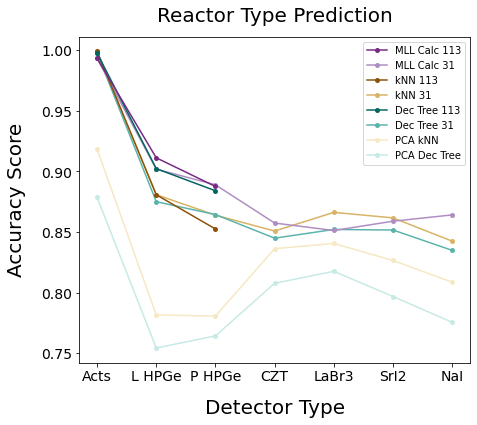

In [36]:
plot_curves('reactor', 'Reactor Type Prediction')

<Figure size 432x288 with 0 Axes>

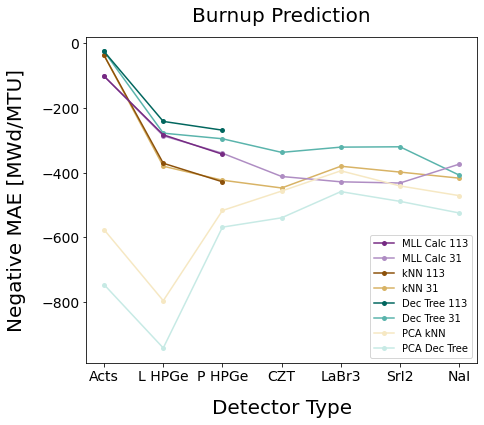

In [37]:
plot_curves('burnup', 'Burnup Prediction')

<Figure size 432x288 with 0 Axes>

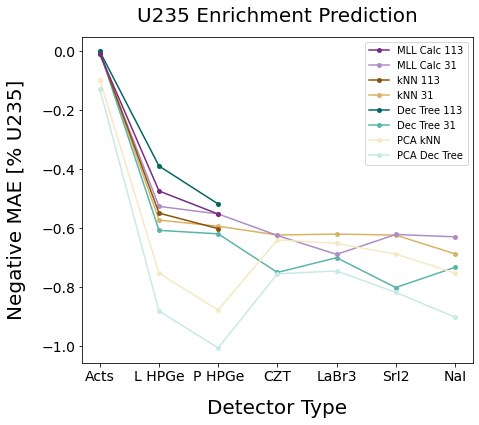

In [38]:
plot_curves('enrichment', 'U235 Enrichment Prediction')

<Figure size 432x288 with 0 Axes>

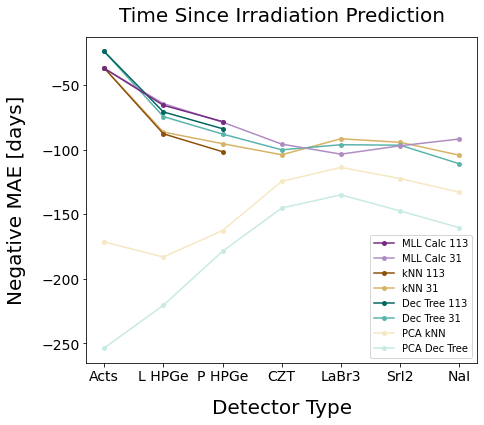

In [39]:
plot_curves('cooling', 'Time Since Irradiation Prediction')